### Auther Zia Ullah
### Task-4: Classification using Decision Tree Algorithum
#### TSF-GRIP Task Submission

In [1]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn import tree

In [2]:
# Loading the dataset

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Splitting the data into Test and Train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Create and train the model

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train ,y_train)
dt_model

DecisionTreeClassifier()

### Checking the Accuracy

In [12]:
predicted_values = dt_model.predict(X_test)
predicted_values

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [15]:
# Checking the accuracy score of the model

accu_Score = sm.accuracy_score(y_test, predicted_values) #here y_test are actual values
accu_Score

1.0

the accuracy is 100% because we use four feature to train the model

### Confusion Matrix 

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

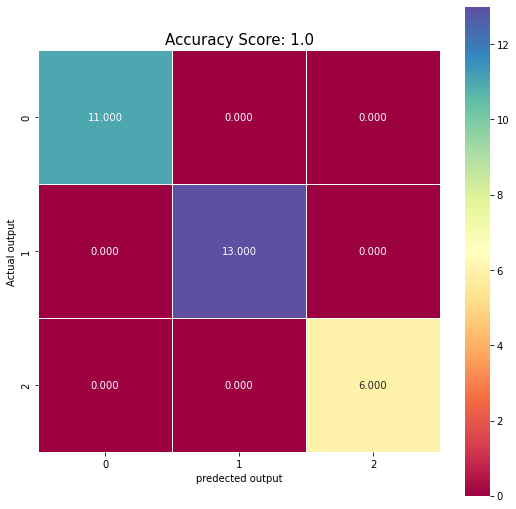

In [21]:
#visualising the confusuion matrix 

plt.figure(figsize= (9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap = 'Spectral')
plt.ylabel("Actual output")
plt.xlabel("predected output")
all_samle_title = f"Accuracy Score: {accu_Score}"
plt.title(all_samle_title, size= 15)

### Visualizing the Decision Tree

Text(0.5, 1.0, "DT's Model of Iris data")

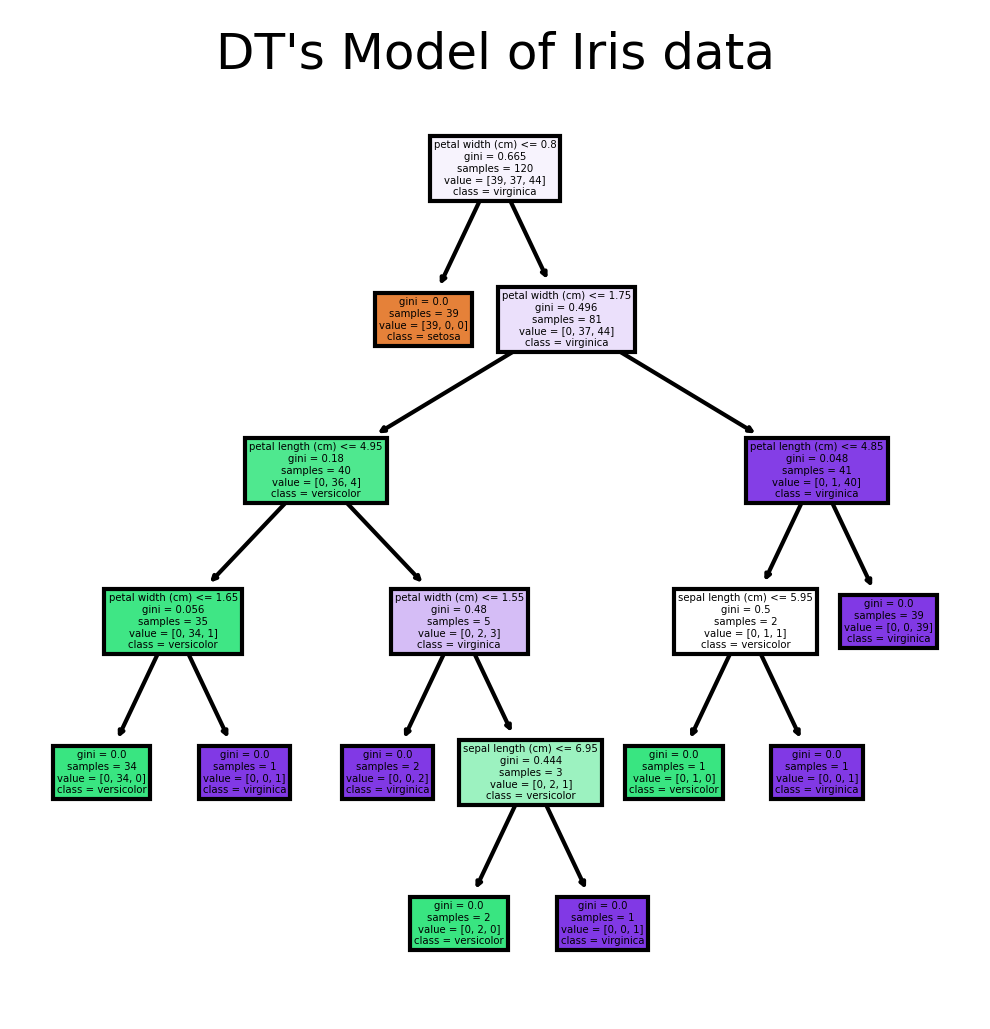

In [10]:
# Visualisation of Decision Tree 

f_name=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
c_name =['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(dt_model, feature_names = f_name, class_names = c_name, filled = True)

plt.title("DT's Model of Iris data")